# Assignment 2
Rodrigo Erices (rerices@umich.edu). Chart Tutorial as Assignment for SIADS 521: Visual Exploration of Data - Fall 2019. 

#### Assignment Background and Objective

The objective of this assignment is to construct a tutorial on a visualization technique that was either not covered in class, or covered but using a different toolkit. The idea is to describe de technique, comment about its use, background and limitations as well as performing a basic demonstration of it.

## Visualization Technique

For this assignment I'm going to use the **Altair** python package and demonstrate **scatterplots**.

### Description of the Technique

Scatterplots are one of the most basic and useful graphing techniques. On its most basic form it requires a series of paired points that are then graphed on a coordinate system (most commonly a cartesian system) such that their projection on the axis correspond to the values the points take for that respective axis. On most advanced uses of the technique, it also serves to include additional dimensions of data, by changing the color codes, sizes and even shapes.

The typical insight obtained by looking at a scatterplot is one of general dependency of one variable against the other (visual correlation), when additional dimesions are included by means of colors or other resources, it also serves to identify distinctly behaving groups within the same data. 

### Usage of the Technique

The technique as commented before is particularly suited to understand correlation between variables, however there are some instances where different approaches would be more useful. 
- One example would be when one of the variables univocally identifies just one observation of the other variable. In such a case, while a scatterplot still shows the data, if we want to visually compare both absolute magnitudes, it is better to use a barchart. 
- Another example is in the case of time series. When we want to compare the evolution of some measurements through time representing different groups, while a scatterplot still works when one adds additional features such as color coding to identify said groups, it might be better to use a lineplot. 
- In general, when the relationship is defined between the two variables by a strict and univocal function, it is better to use a different approach to chart the data. Scatterplots are suited for relationships that are not exact, so that we can visually extract the degree of any underlying relationship.

## Visualization Library (Altair)

### Background on Altair

[Altair](https://altair-viz.github.io/) is a (self-styled) declarative statistical visualization library for Python, based on Vega and Vega-Lite. It was created by [Jake Vanderplas](http://vanderplas.com/) who is a director of Open Software at the University of Washington's eScience institute. 

Declarative visualizations -as opposed to procedural visualizations- are the ones who map data directly into pre-defined schemas of how a given graph works, instead of explicitly directing what drawing steps should be taken to construct a graph. Vega is a grammar (i.e. specification of how a graphs work) in JSON format that then is displayed by JavaScript on suitable devices. As Vega specifications can be quite cumbersome to construct, there exists Vega-Lite which is a higher-level specification of graphs that outputs to Vega. Altair was constructed on top of Vega-Lite as it is a Python wrapper for the Vega-Lite specification.

Altair was first released in 2016, under a BSD 3-Clause License. As of November, 2019 it is on 3.2.0 version. 

### Why use Altair?
Altair is particularly useful for tidy datasets, that come in a panel format where each row represents an observation and column represents different measurements. This usefulness stems from the flexibility and power of the Vega grammar itself, which is also used by other popular visualization tools such as Tableau. 

After watching some demonstrations of Altair, I've come to the conclusion that mastery of the package, enables one to very quickly explore insights about data, without having to worry about how to construct the graphs, but rather on pointing towards the features one is interested in examining. 

### Installing Altair

Altair is available on common package managers and its recommended (by Altair's documentation) installation procedure is:

        conda install -c conda-forge altair vega_datasets jupyterlab
        
Or

        pip install -U altair vega_datasets jupyterlab
        
To both install the package itself, *JupyterLab* as its recommended user interface and *vega_datasets* a common dataset for demonstration purposes.       
        

### General Approach
The basic approach taken by Altair follows 3 steps.
1. First a tidy dataset is called with reference to the Altair API.
2. A type of mark is specified: this could be any of a list, among of which 'points' is relevant for scatterplots.
    - Some others could be lines, ticks, bars, text, geoshapes, etc. 
3. Encodings are defined: this is where data is linked to features of the pre-defined visualization. For example: 
    - The mapping of x and y coordinates to given columns. 
    - The color coding of groups of points with reference to a qualitative or quantitative column.
    - The sizing of some points referenced to another column.
    
There are more advanced features of Altair, among of which we can count:
4. Selections for specifiying how to interact with data.
5. Conditions to specify how the chart responds to given interactions. 
6. Compounding to merge or concatenate graphs together.  

### Limitations
There are two important limitations that I've encountered so far with Altair:
1. Datasets must be tidy, meaning they should be in tabular form where each observation is encoded in one row. 
2. When dealing with numerous rows, there is a builin limitation to 5000 rows. This is to prevent overly memory-intensive graphs. This limitation is avoidable, however notebook size starts to increase rapidly

## Demonstration

In [1]:
import altair as alt
import pandas as pd
from vega_datasets import data

### Dataset
For this demonstration I'm going to use one of the accompanying datasets of the Vega repositorium. These datasets are provided for the purposes of constructing examples of Vega projects. In particular I'm settling for the Gapminder Dataset, as it contains several observations with many columns that can help serve as encodings for demonstration purposes.

In [2]:
df = data.gapminder()

### Basic Exploration of Data
Here we will try to get a basic understanding of the kind of data stored in the dataset. The idea is to try to form a intial idea of what could the interesting to chart as a basic scatterplot.

In [3]:
df.shape

(693, 6)

In [4]:
df.head()

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.332,7.7
1,1960,Afghanistan,0,9829450,31.997,7.7
2,1965,Afghanistan,0,10997885,34.020,7.7
3,1970,Afghanistan,0,12430623,36.088,7.7
4,1975,Afghanistan,0,14132019,38.438,7.7


In [5]:
df.country.unique()

array(['Afghanistan', 'Argentina', 'Aruba', 'Australia', 'Austria',
       'Bahamas', 'Bangladesh', 'Barbados', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cuba', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'Grenada', 'Haiti', 'Hong Kong', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kenya', 'South Korea', 'North Korea', 'Lebanon', 'Mexico',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Rwanda',
       'Saudi Arabia', 'South Africa', 'Spain', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Venezuela'], dtype=object)

### What could we explore?
We can see we have several yearly variables at our disposal for analysis, and that data spans several years as well as different countries. 

**Let's try to understand the relationship between 'fertility' and 'life_expectancy'**. I believe these particular two columns are interesting because its not obvious what's their relationship, specially when one controls for the other variables. **This is going to be the main topic to explore for the rest of the tutorial** and it will help shed some light on how Scatterplots with Altair are specially well suited for this kind of exploration.

### Constructing a Basic Scatterplot
The minimum elements to construct a chart with Altair is the specification of dataset to be used, and the mark to display information. For a scatterplot we must use the 'mark_point()' method. 

In [6]:
alt.Chart(df).mark_point()

This chart is not quite informative, but it sheds light on how Altair works. The most relevant feature here is that it acually displays something. Although, as we haven't indicated what are we going to be using as 'x' and 'y' coordinates, there is no information to display. 

Let's add tha information through an encoding.

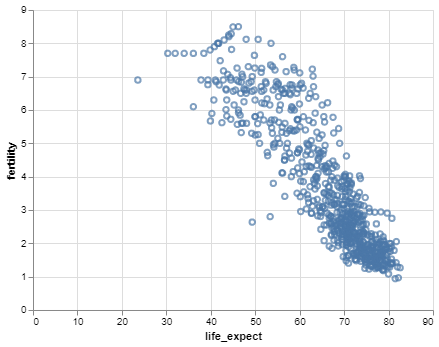

In [7]:
alt.Chart(df).mark_point().encode(
    x = 'life_expect',
    y = 'fertility')

Very easily we notice that there is a strong negative relationship. And several questions come to mind: 
- How stable through time is this relationship?
- What can be the role of population in this relationship?
- How different can it be from country to country?

**I will try to explore this questions in order to highligh more advanced features of Altair**.

### Adding Advanced Features to the Scatterplot
To explore these last questions, Altair offers several easy additions to try to get that insight from data.

##### Color Coding
Let's first try to assess the stability through time by coloring the dots with passing time. In order to do this, we just add a color enconding as an option.

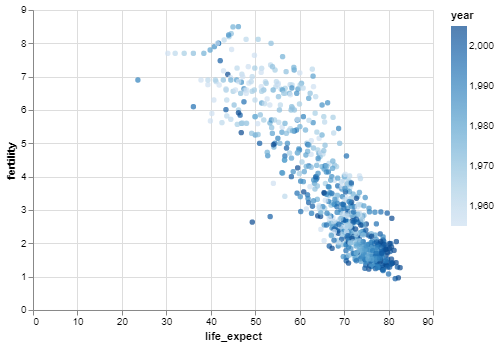

In [8]:
alt.Chart(df).mark_point().encode(
    x = 'life_expect',
    y = 'fertility',
    fill = 'year'
)

Great! Now we can appreciate how a rather clear tendency for both life expectancy and fertility to decrease through time, as evidenced by stronger colors on the lower right of the chart.

#### Comparing Plots Side by Side by Dividing them Into Columns
Lets try to assess how this very same relationship changes as countries reach different sizes. In order to do this, lets first segment the countries into quantiles, based on their average population. 

In [9]:
# we create a list of size categories by dividing in 3 quartiles
size_categories = pd.qcut(df[['country', 'pop']].groupby('country').mean()['pop'], 3, labels = ['small', 'medium', 'large'])
size_categories = size_categories.reset_index().rename({'pop': 'size'}, axis = 1)

# and add this data to our original dataset
df = df.merge(size_categories, on = 'country')

We can use Altair to very easily compare side by side the dataset as separated into columns by some categories.

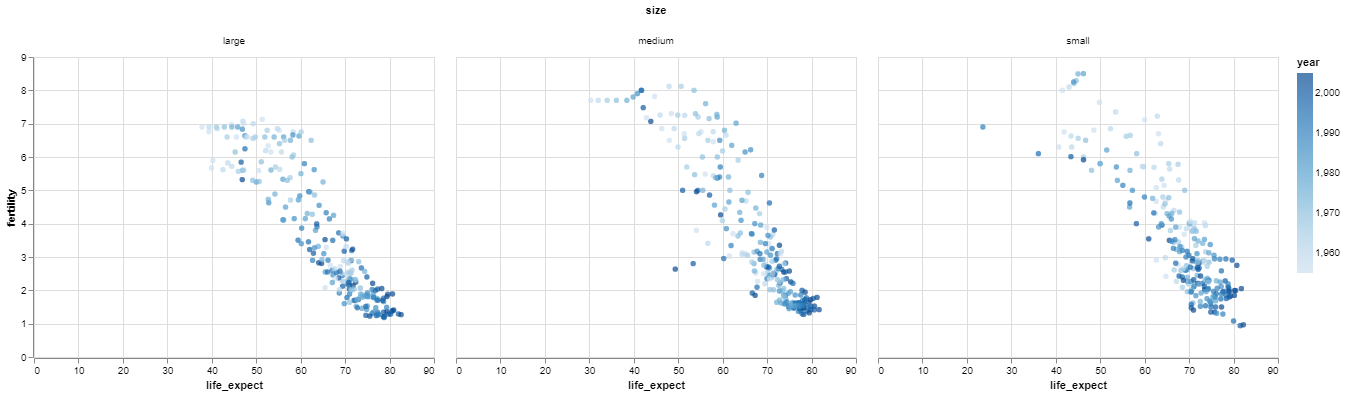

In [10]:
alt.Chart(df).mark_point().encode(
    x = 'life_expect',
    y = 'fertility',
    fill = 'year',
    column = 'size'
)

From this charts we can appreciate that actually country size does not have such an important effect on the relationship, as its maintained in all of the different plots.

#### Using Selections in Joined Plots
We can now try to address the following question, about how can the relationship behave differently for distinct countries.

One naive approach would be to change the color code from years to countries, and switch the time encoding to opacity in the hopes of preserving the information.

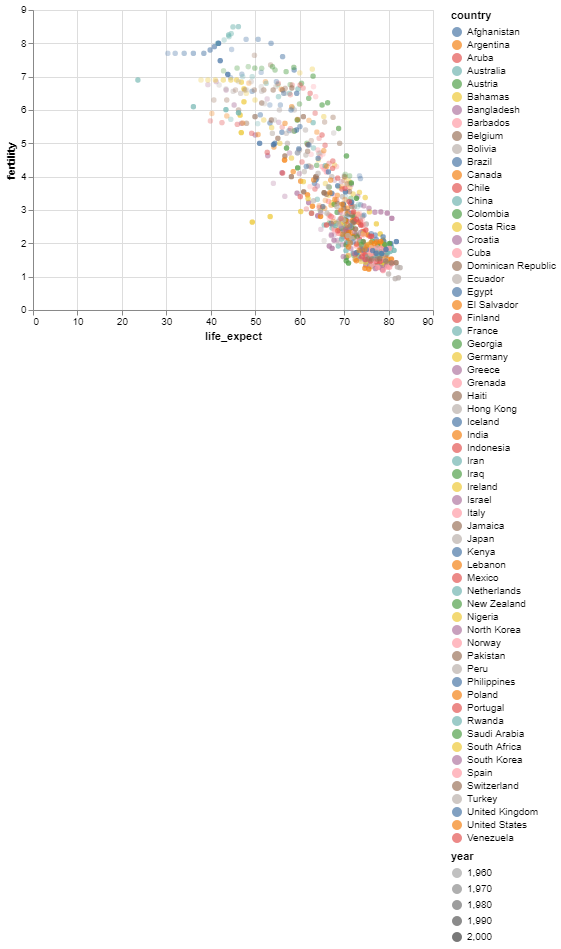

In [11]:
alt.Chart(df).mark_point().encode(
    x = 'life_expect',
    y = 'fertility',
    fill = 'country',
    opacity = 'year'
)

Its not too difficult to be convinced that this graph does not work. While the opacity for time data sort of works -one can still discern the time variation- There are too many countries, and one rapidly loses track of any relationship enconded in colors. Although its easy to see that such changes are easily implemented in Altair.

Let's try to better this graph, by selecting a subsegment of the countries, while at the same time we highligh the powerful interactive capabilities of Altair for data exploration.

##### Defining a Selection
In order to make the graphs interactive, and able to select a subset of countries, we must first define what we want to control. For this we can use the 'selection_multi' method of Altair, where we define what fields the selection is going to be responsive to, in this case, this selector is going to be sensitive to size groupings.

In [12]:
selection = alt.selection_multi(fields = ['size'], init = {'size':'medium'})

This selection must be used on a plot to work, and for this we construct a barplot that shows the average population for each size category.

In [13]:
bar = alt.Chart(df).mark_bar().encode(
    x = 'mean(pop)',
    y = 'size', 
    color = alt.Color('size', legend = None)).properties(selection = selection)

##### Using a Filter from a Selection
We still want to maintain the plot we're interested in, so we define it here, with the caveat that its going to be filtering on the previously defined selection.

In [14]:
scatter = alt.Chart(df).mark_point().encode(
    x = 'life_expect',
    y = 'fertility',
    fill = 'country',
    opacity = alt.Opacity('year', legend = None),
).transform_filter(selection)

##### Joining Two Plots and Making them Interactive
The final step is just to join these two plots together. Its particularly easy, as its just join them by the '&' operator. This operator joins the graphs vertically (the '|' operator can be used to concatenate horizontally). But its not just a matter of display, as these are linked as well through the selection defined on them.

And now we're left with a clickable barchart and a responsive scatterplot on the countries selected on the barchart. This mechanism allows us at the same time to explore the different variables we were interested in with just a few simple commands.

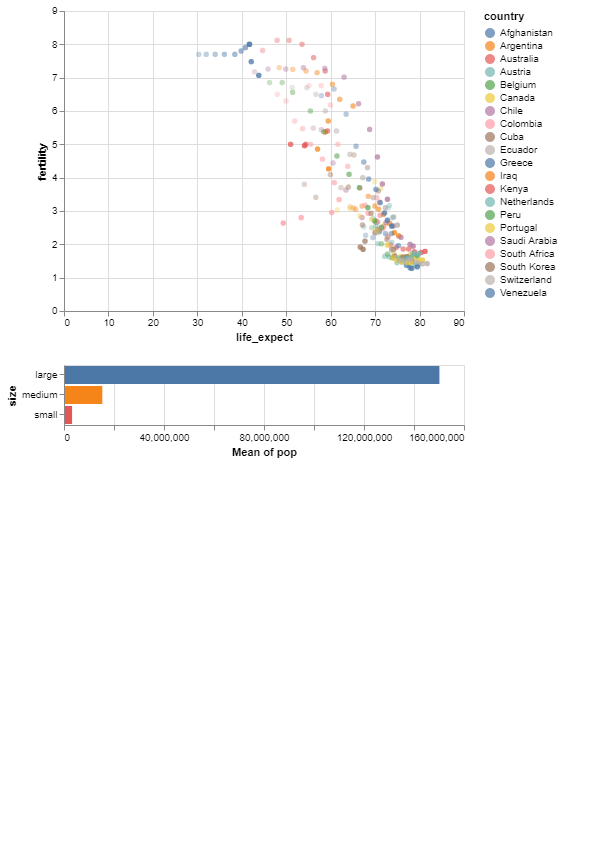

In [15]:
scatter & bar

While this last chart still might use some work. While we reduced the amount of countries on display there are still too many to be identifiable. However, with just a few simple steps we constructed a powerful interactive display that manages to let us work with our variables of interest. 

## On the Ten Rules
Here I describe which rules I tried to adhere to and what I believe to be the justification for it.

#### Rule #1
One common thread for the demonstration was to start with a basic exploration of a given dataset, and then to pose certain questions that will be answered as the data narrative progresses. In the markdown cells there is a clear explanation of the steps taken to prepare data, construct the relevant charts and then the insights obtained from them.

#### Rule #2
I took particular care to document the process of construting the relevant visualizations with Altair. This naturally stems from the above rule, but I also took care to document whenever I tried exploring a visualization but found that actually it was not a very good one, the process is then documented on how that could be fixed.

#### Rule #3
I made liberal use of cell divisions. Each cell is supposed to perform just one task, as they are plenty of markdown cells to explain what's going on and what each cell is supposed to be doing.

#### Rule #9
In order to make the tutorial accesible, repeatible and editable I hosted in on GitHub as [Altair Tutorial](https://github.com/rerices/altair-tutorial). I granted it a MIT License permission for others to be able to reuse my work easily. 